## Thomson Sampling Practice - Click Through Rate Optimization.

We're pretending that we have 10 different ads to use on our ecommerce site, and we want to find out which is the most effective. We'll use a simulated dataset including 10,000 users and which ad each user would and would not click on. Of course in the wild we would not know which ads each user would and would not click on, but this is the only way to practice the process without actually running the experiement. The objective of this practice problem is to maximize the reward and yield the most possible clicks. To do so, we'll use the Thomson Sampling method, which aims to figure out the best add as quickly as possible, and then exploits that add for the rest of the users. This exercise is guided by the SuperDataScience Machine Learning Course.

### Load Data

In [1]:
cd '/Users/sauce/Desktop/Courses/Machine Learning A-Z Template Folder/Part 6 - Reinforcement Learning/Section 33 - Thompson Sampling/Thompson_Sampling'

/Users/sauce/Desktop/Courses/Machine Learning A-Z Template Folder/Part 6 - Reinforcement Learning/Section 33 - Thompson Sampling/Thompson_Sampling


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
dataset = pd.read_csv('Ads_CTR_Optimisation.csv')

 Check out how our data is structured. Remember that this is a simulated dataset, and in a real world setting we would have no idea which ads each user would click on.

In [4]:
dataset.head()

,Ad 1,Ad 2,Ad 3,Ad 4,Ad 5,Ad 6,Ad 7,Ad 8,Ad 9,Ad 10
0,1,0,0,0,1,0,0,0,1,0
1,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0


As a point of reference, the data above indicates that user 0 would click on ads 1, 5 and 9 and wouldnt not click on any of the rest. This is something that we wouldn't know in the wild, but the model would learn as the adds are displayed randomly to users.

### Implement Thomson Sampling

In [5]:
import random

# Number of trails to be run - one for each user.
N = 10000
# Length of each vector
d = 10
# Empty list
ads_selected = []
# Create vector of 0s of length d for the number of rewawrds 1
numbers_of_rewards_1 = [0] * d
# Create vector of 0s of length d for the number of rewawrds 0
numbers_of_rewards_0 = [0] * d
# Initialize total rewards
total_reward = 0

for n in range(0, N): 
    ad = 0 # initialize ad variable. Will be used to see which add to show to the user
    max_random = 0 # finding the maximum random draw of each round
    for i in range(0, d): # length of each vector
        random_beta = random.betavariate(numbers_of_rewards_1[i] + 1, numbers_of_rewards_0[i] + 1)
        if random_beta > max_random: # if random draw is greater than the previous max random then max_random is replaced
            max_random = random_beta
            ad = i # The ad will be the whatever ad yielded the greatest reward for the given round.
    ads_selected.append(ad)
    reward = dataset.values[n, ad] # Check to see if the user clicked on selected ad
    if reward == 1:
        numbers_of_rewards_1[ad] = numbers_of_rewards_1[ad] + 1
    else:
        numbers_of_rewards_0[ad] = numbers_of_rewards_0[ad] + 1 
    total_reward = total_reward + reward

In [9]:
print("The total reward for this thomson sampling method is", total_reward)

The total reward for this thomson sampling method is 2594


### Visualize Results

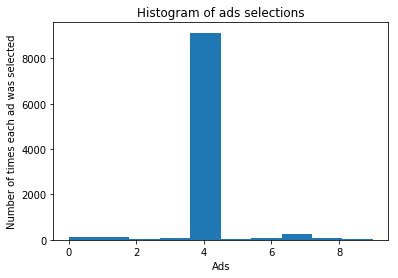

In [10]:
# Visualising the results - Histogram
plt.hist(ads_selected)
plt.title('Histogram of ads selections')
plt.xlabel('Ads')
plt.ylabel('Number of times each ad was selected')
plt.show()

It's quite clear that ad 5 was our most rewarding ad. The thomson sampling method quickly figures out which "bandit" is the most effective and then exploits it for maximum reward. For this particular problem, the Thomson sampling method showed to be more effective than the Upper Bound Convidence method, and much more effective than randomly showing ads to users.